In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('bmh')

In [3]:
df = pd.read_parquet('../data/01-07-2023/FEATURE_DATA_FMT')
df

,AREA,PROFESSION,GEN_GRP,LIFE_STG,AGE,LOR,CREDIT_SCORE,CASA_BAL_SUM_36M,CASA_TXN_AMT_SUM_36M,CASA_BAL_SUM_LATEST,LOAN_SUM_LATEST
CUSTOMER_CDE,,,,,,,,,,,
11920950,VN0010007,"Kinh doanh tai san, dich vu tu van",Gen X,Thiết lập tài sản,43.0,1855.0,77.60,2.983756e+10,9.665504e+11,1.105251e+10,4.500000e+09
1644268,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Bảo vệ tài sản,48.0,4891.0,NaN,4.369451e+08,1.196619e+10,1.189906e+10,NaN
5005000,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Bảo vệ tài sản,46.0,3369.0,80.63,7.398799e+10,1.073215e+12,1.683214e+10,NaN
12137341,VN0010003,"Kinh doanh tai san, dich vu tu van",Trước Gen X,Cuối sự nghiệp,63.0,1800.0,NaN,1.000040e+05,9.979950e+09,1.600005e+10,NaN
7578327,VN0010007,"Kinh doanh tai san, dich vu tu van",Gen X,Thiết lập tài sản,45.0,2809.0,NaN,9.654259e+10,1.164922e+12,3.060014e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9042762,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen Y,Thiết lập tài sản,41.0,2581.0,NaN,4.886361e+10,1.565830e+11,1.907538e+09,NaN
3834245,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen Y,Lập gia đình,32.0,3760.0,NaN,1.065544e+09,9.518256e+09,2.273721e+09,4.034270e+08
9056176,VN0010003,"Thuong nghiep, sua chua",Gen Y,Lập gia đình,29.0,2579.0,NaN,1.207823e+07,1.001950e+10,3.000496e+09,2.750000e+09


In [4]:
df.columns

Index(['AREA', 'PROFESSION', 'GEN_GRP', 'LIFE_STG', 'AGE', 'LOR',
       'CREDIT_SCORE', 'CASA_BAL_SUM_36M', 'CASA_TXN_AMT_SUM_36M',
       'CASA_BAL_SUM_LATEST', 'LOAN_SUM_LATEST'],
      dtype='object')

In [5]:
X = df

In [6]:
y = pd.read_parquet('../data/01-07-2023/REACTIVATED_CASA')
y = y[['CUSTOMER_CDE', 'FTR_VAL']]
y.rename(columns={'FTR_VAL': 'REACTIVATED_CASA'}, inplace=True)
y['REACTIVATED_CASA'] = y['REACTIVATED_CASA'].astype(int)

In [7]:
y

,CUSTOMER_CDE,REACTIVATED_CASA
0,5493517,0
1,9641850,0
2,6309615,0
3,6743366,0
4,11903114,0
...,...,...
1016727,17617923,0
1016728,17619581,0
1016729,17584129,0
1016730,17596343,0


In [8]:
X = X.merge(y, how='inner', left_index=True, right_on='CUSTOMER_CDE')

In [9]:
y = X.pop('REACTIVATED_CASA')
X = X.drop(columns=['CUSTOMER_CDE'])

In [10]:
model = pickle.load(open('../model/pipeline_xgboost_casa_forward_6mob','rb'))
model

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_tf',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>))]),
                                                  ['CASA_BAL_SUM_LATEST',
                                                   'LOAN_SUM_LATEST']),
                                                 ('num2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

<Axes: >

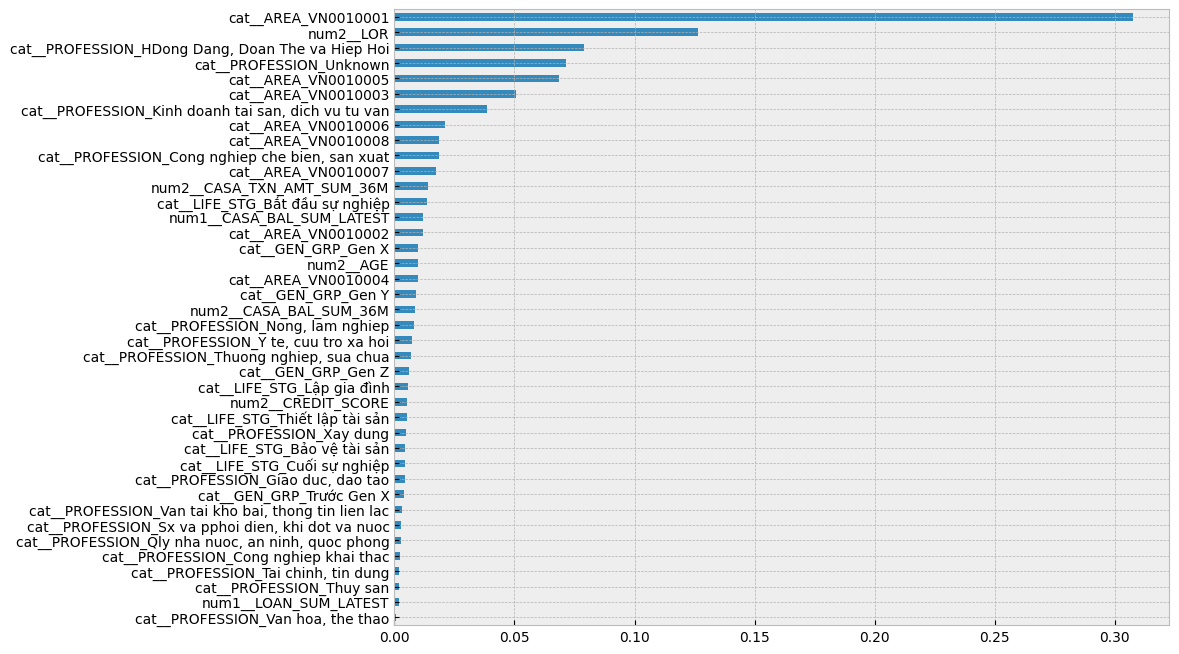

In [11]:
featimp_series = pd.Series(model[-1].feature_importances_, index=model[:-1].get_feature_names_out())
featimp_series.nlargest(40)[::-1].plot(kind='barh', figsize=(10, 8))

In [12]:
y_pred = model.predict(X)
y_prob = model.predict_proba(X)

In [13]:
from sklearn import metrics
import seaborn as sns

In [14]:
pd.Series(y_pred).value_counts(), pd.Series(y_pred).value_counts(normalize=True)

(0    1005722
 1      11010
 dtype: int64,
 0    0.989171
 1    0.010829
 dtype: float64)

In [15]:
p,r,f,_ = metrics.precision_recall_fscore_support(y, y_pred)
auc = metrics.roc_auc_score(y, y_prob[:,1])
gini = 2 * auc - 1
print(p,r,f)
print(auc,gini)
print(metrics.classification_report(y, y_pred))

[0.9893221  0.75440509] [0.99728973 0.43612497] [0.99328994 0.55272001]
0.9203994122469331 0.8407988244938662
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    997687
           1       0.75      0.44      0.55     19045

    accuracy                           0.99   1016732
   macro avg       0.87      0.72      0.77   1016732
weighted avg       0.98      0.99      0.99   1016732



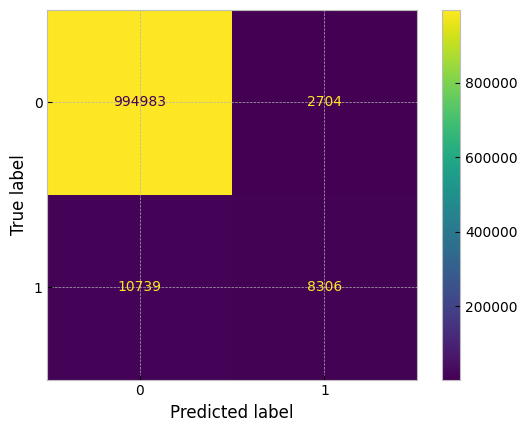

In [16]:
metrics.ConfusionMatrixDisplay.from_predictions(y, y_pred)

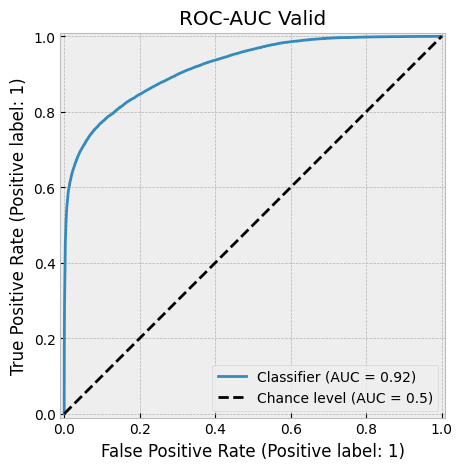

In [17]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
metrics.RocCurveDisplay.from_predictions(y, y_prob[:,1], plot_chance_level=True, ax=axs)
axs.set_title('ROC-AUC Valid')
plt.grid = True
plt.show()

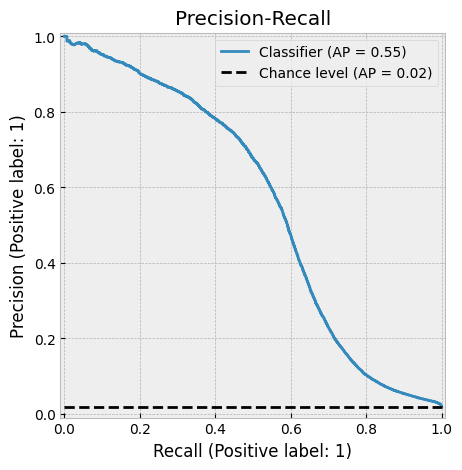

In [18]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
metrics.PrecisionRecallDisplay.from_predictions(y, y_prob[:,1], plot_chance_level=True, ax=axs)
axs.set_title('Precision-Recall')
axs.legend(loc='upper right')
plt.show()

In [19]:
def plot_precision_recall_with_thresholds(y_test, y_prob, ax):
    y_score = y_prob
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_score)
    f1 = [2 * (p * r) / (p + r) for p, r in zip(precisions, recalls)]
    max_idx = np.argmax(f1)
    df = pd.DataFrame({
        'threshold': [0] + thresholds.tolist(),
        'precision': precisions,
        'recall': recalls,
        'f1-score': f1
    })
    sns.lineplot(df.set_index('threshold'), palette='tab10', ax=ax, )
    ax.plot(thresholds[max_idx], f1[max_idx], marker='*', color='r', markersize=10)
    ax.text(thresholds[max_idx], f1[max_idx], f'({thresholds[max_idx]:.2f},{f1[max_idx]:.2f})', ha='left',va='top')

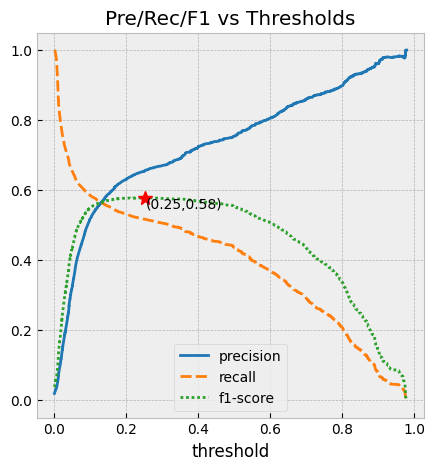

In [20]:
fig, axs = plt.subplots(1,1,figsize=(5, 5))
plot_precision_recall_with_thresholds(y, y_prob[:,1], ax=axs)
axs.set_title('Pre/Rec/F1 vs Thresholds')
plt.show()